# MIE 1624 Assignment 3

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import html
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from matplotlib.pyplot import figure
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix

### Load Data

In [2]:
df_sa = pd.read_csv('sentiment_analysis.csv')
df_sa.head(10)

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
5,7.680980e+17,RT @SH4WNSMILE: -Who is excited for illuminate...,1
6,7.680980e+17,RT @KendallHuntRPD: The #firstdayofschool for ...,1
7,7.680980e+17,RT @BantySrkian: #SRK and kajol in the making ...,1
8,7.680980e+17,RT @GayHopper_com: I'm happy! https://t.co/fKX...,1
9,7.680980e+17,"RT @StarCinema: Kathryn, Daniel share memorabl...",1


In [3]:
df_el = pd.read_csv('US_Elections_2020.csv')
df_el.head(10)

,text,sentiment,negative_reason
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19
3,b'Every 107 seconds an American is dying from ...,1,NaN
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN
5,accelerating. &amp; rising when all #Americans...,0,discrimination
6,b'@realDonaldTrump 961 dead Americans in one d...,0,discrimination
7,b'#COVID19 #coronavirus #coronavirusuk #COVID ...,1,NaN
8,b'@charliekirk11 only reason @realdonaldtrump ...,0,corruption
9,"b""RT @JoeBarri: Anyone who's concerned in the ...",0,covid19


# 1. Data Cleaning

### Remove HTML tags and hash tags

In [4]:
def remove_tag(text):
    text = re.sub('/<[^>]+>/', '', text) # remove html tags
    text = re.sub('#', '', text) # remove hash tags
    return text

In [5]:
df_sa['text'] = df_sa['text'].apply(lambda x: remove_tag(x))
df_sa.head(10)

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
5,7.680980e+17,RT @SH4WNSMILE: -Who is excited for illuminate...,1
6,7.680980e+17,RT @KendallHuntRPD: The firstdayofschool for s...,1
7,7.680980e+17,RT @BantySrkian: SRK and kajol in the making o...,1
8,7.680980e+17,RT @GayHopper_com: I'm happy! https://t.co/fKX...,1
9,7.680980e+17,"RT @StarCinema: Kathryn, Daniel share memorabl...",1


In [6]:
df_el['text'] = df_el['text'].apply(lambda x: remove_tag(x))
df_el.head(10)

,text,sentiment,negative_reason
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others
2,b'RT @WalidPhares: Uber Timing: after Biden ad...,0,covid19
3,b'Every 107 seconds an American is dying from ...,1,NaN
4,b'RT @thewebbix: The Democrats embrace Diversi...,1,NaN
5,accelerating. &amp; rising when all Americans ...,0,discrimination
6,b'@realDonaldTrump 961 dead Americans in one d...,0,discrimination
7,b'COVID19 coronavirus coronavirusuk COVID UKlo...,1,NaN
8,b'@charliekirk11 only reason @realdonaldtrump ...,0,corruption
9,"b""RT @JoeBarri: Anyone who's concerned in the ...",0,covid19


### Replace HTML character codes

Replace HTML characters with corresponding strings

In [7]:
def replace_html(text):
    text = html.unescape(text) # replace HTML characters
    return text

In [8]:
df_sa['text'] = df_sa['text'].apply(lambda x: replace_html(x))
df_sa.head(10)

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
5,7.680980e+17,RT @SH4WNSMILE: -Who is excited for illuminate...,1
6,7.680980e+17,RT @KendallHuntRPD: The firstdayofschool for s...,1
7,7.680980e+17,RT @BantySrkian: SRK and kajol in the making o...,1
8,7.680980e+17,RT @GayHopper_com: I'm happy! https://t.co/fKX...,1
9,7.680980e+17,"RT @StarCinema: Kathryn, Daniel share memorabl...",1


In [9]:
df_el['text'] = df_el['text'].apply(lambda x: replace_html(x))
df_el.head(10)

,text,sentiment,negative_reason
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others
2,b'RT @WalidPhares: Uber Timing: after Biden ad...,0,covid19
3,b'Every 107 seconds an American is dying from ...,1,NaN
4,b'RT @thewebbix: The Democrats embrace Diversi...,1,NaN
5,accelerating. & rising when all Americans kill...,0,discrimination
6,b'@realDonaldTrump 961 dead Americans in one d...,0,discrimination
7,b'COVID19 coronavirus coronavirusuk COVID UKlo...,1,NaN
8,b'@charliekirk11 only reason @realdonaldtrump ...,0,corruption
9,"b""RT @JoeBarri: Anyone who's concerned in the ...",0,covid19


### Remove URLs and convert characters to lowercase

In [10]:
def remove_url(text):
    text = re.sub('https?:\/\/.\S+', "", text) # remove URLs
    return text

In [11]:
df_sa['text'] = df_sa['text'].apply(lambda x: remove_url(x.lower())) # convert to lowercase
df_sa.head(10)

,ID,text,label
0,7.680980e+17,josh jenkins is looking forward to tab breeder...,1
1,7.680980e+17,rt @mianusmanjaved: congratulations pakistan o...,1
2,7.680980e+17,"rt @pepalerts: this september, @yesmag is taki...",1
3,7.680980e+17,"rt @david_gaibis: newly painted walls, thanks ...",1
4,7.680980e+17,rt @cedricfeschotte: excited to announce: as o...,1
5,7.680980e+17,rt @sh4wnsmile: -who is excited for illuminate...,1
6,7.680980e+17,rt @kendallhuntrpd: the firstdayofschool for s...,1
7,7.680980e+17,rt @bantysrkian: srk and kajol in the making o...,1
8,7.680980e+17,rt @gayhopper_com: i'm happy!,1
9,7.680980e+17,"rt @starcinema: kathryn, daniel share memorabl...",1


In [12]:
df_el['text'] = df_el['text'].apply(lambda x: remove_url(x.lower())) # convert to lower case
df_el.head(10)

,text,sentiment,negative_reason
0,"b'@robreiner so afraid of nov, dec, and jan! e...",0,covid19
1,"b""rt @suec00k: lord sumption launches recovery...",0,others
2,b'rt @walidphares: uber timing: after biden ad...,0,covid19
3,b'every 107 seconds an american is dying from ...,1,NaN
4,b'rt @thewebbix: the democrats embrace diversi...,1,NaN
5,accelerating. & rising when all americans kill...,0,discrimination
6,b'@realdonaldtrump 961 dead americans in one d...,0,discrimination
7,b'covid19 coronavirus coronavirusuk covid uklo...,1,NaN
8,b'@charliekirk11 only reason @realdonaldtrump ...,0,corruption
9,"b""rt @joebarri: anyone who's concerned in the ...",0,covid19


### Remove stopwords

Stopword refers to the most common words in a language which does not add much meaning to a sentence. They are usually filtered out before or after processing of natural language data. In this case, we removed stopwords  listed in "stop_words.txt" file.

In [13]:
stopword = [line.strip() for line in open('stop_words.txt')] # extract stopwords from given txt file

def remove_stopwords(text):
    text = [word for word in text if word not in stopword] # remove stopwords listed in txt file
    text = ' '.join(text)
    return text

In [14]:
df_sa['text'] = df_sa['text'].apply(lambda x: remove_stopwords(x.split()))
df_sa.head(10)

,ID,text,label
0,7.680980e+17,josh jenkins forward tab breeders crown super ...,1
1,7.680980e+17,rt @mianusmanjaved: congratulations pakistan n...,1
2,7.680980e+17,"rt @pepalerts: september, @yesmag maine mendoz...",1
3,7.680980e+17,"rt @david_gaibis: newly painted walls, custodi...",1
4,7.680980e+17,rt @cedricfeschotte: excited announce: july 20...,1
5,7.680980e+17,rt @sh4wnsmile: -who excited illuminate !? -....,1
6,7.680980e+17,rt @kendallhuntrpd: firstdayofschool students ...,1
7,7.680980e+17,rt @bantysrkian: srk kajol making ddlj song .....,1
8,7.680980e+17,rt @gayhopper_com: i'm happy!,1
9,7.680980e+17,"rt @starcinema: kathryn, daniel share memorabl...",1


In [15]:
df_el['text'] = df_el['text'].apply(lambda x: remove_stopwords(x.split()))
df_el.head(10)

,text,sentiment,negative_reason
0,"b'@robreiner afraid nov, dec, jan! bidenharris...",0,covid19
1,"b""rt @suec00k: lord sumption launches recovery...",0,others
2,b'rt @walidphares: uber timing: biden advisors...,0,covid19
3,b'every 107 seconds american dying trumpvirus ...,1,NaN
4,b'rt @thewebbix: democrats embrace diversityan...,1,NaN
5,accelerating. & rising americans killed trumpv...,0,discrimination
6,b'@realdonaldtrump 961 dead americans day! 240...,0,discrimination
7,b'covid19 coronavirus coronavirusuk covid uklo...,1,NaN
8,b'@charliekirk11 reason @realdonaldtrump 3 ral...,0,corruption
9,"b""rt @joebarri: who's concerned hunterbiden tr...",0,covid19


### Remove 'b' at the beginning of text of US election data

In [16]:
def remove_b(text):
    text = re.sub('^b', '', text) # remove b at the beginning of text of US election data
    return text

In [17]:
df_el['text'] = df_el['text'].apply(lambda x: remove_b(x)) 
df_el.head(10)

,text,sentiment,negative_reason
0,"'@robreiner afraid nov, dec, jan! bidenharris2...",0,covid19
1,"""rt @suec00k: lord sumption launches recovery ...",0,others
2,'rt @walidphares: uber timing: biden advisors ...,0,covid19
3,'every 107 seconds american dying trumpvirus \...,1,NaN
4,'rt @thewebbix: democrats embrace diversityand...,1,NaN
5,accelerating. & rising americans killed trumpv...,0,discrimination
6,'@realdonaldtrump 961 dead americans day! 240 ...,0,discrimination
7,'covid19 coronavirus coronavirusuk covid ukloc...,1,NaN
8,'@charliekirk11 reason @realdonaldtrump 3 rall...,0,corruption
9,"""rt @joebarri: who's concerned hunterbiden tru...",0,covid19


### Remove punctuations and 'rt'

In [18]:
def remove_punct_rt(text):
    text  = ''.join([word for word in text if word not in string.punctuation]) # remove punctuations
    text = re.sub('^rt[\s]+', '', text) # remove rt
    return text

In [19]:
df_sa['text'] = df_sa['text'].apply(lambda x: remove_punct_rt(x))
df_sa.head(10)

,ID,text,label
0,7.680980e+17,josh jenkins forward tab breeders crown super ...,1
1,7.680980e+17,mianusmanjaved congratulations pakistan no1tes...,1
2,7.680980e+17,pepalerts september yesmag maine mendoza’s sur...,1
3,7.680980e+17,davidgaibis newly painted walls custodial pain...,1
4,7.680980e+17,cedricfeschotte excited announce july 2017 fes...,1
5,7.680980e+17,sh4wnsmile who excited illuminate,1
6,7.680980e+17,kendallhuntrpd firstdayofschool students teac...,1
7,7.680980e+17,bantysrkian srk kajol making ddlj song greate...,1
8,7.680980e+17,gayhoppercom im happy,1
9,7.680980e+17,starcinema kathryn daniel share memorable expe...,1


In [20]:
df_el['text'] = df_el['text'].apply(lambda x: remove_punct_rt(x)) 
df_el.head(10)

,text,sentiment,negative_reason
0,robreiner afraid nov dec jan bidenharris2020 w...,0,covid19
1,suec00k lord sumption launches recovery initi...,0,others
2,walidphares uber timing biden advisors pressur...,0,covid19
3,every 107 seconds american dying trumpvirus nn...,1,NaN
4,thewebbix democrats embrace diversityandinclus...,1,NaN
5,accelerating rising americans killed trumpvirus,0,discrimination
6,realdonaldtrump 961 dead americans day 240 tim...,0,discrimination
7,covid19 coronavirus coronavirusuk covid uklock...,1,NaN
8,charliekirk11 reason realdonaldtrump 3 rallies...,0,corruption
9,joebarri whos concerned hunterbiden trump assk...,0,covid19


# 2. Exploratory analysis

### Political party determination

Relevant words that can be used to identify to republican and democratic parties are incorporated to two lists below, respectively. The relevant words are either selected from the links below, or from the word clouds of US elections data based on words' political affiliations on Twitter.

References of politically relevant words:
<br>
https://journals.plos.org/plosone/article/figure?id=10.1371/journal.pone.0137422.t003
<br>
https://www.researchgate.net/figure/Top-20-words-by-Democrats-and-Republicans_tbl3_276026268

In [21]:
GOPword = ['trump','god','america','great','tax','conserve','state','run','govern','vote','illegal', 'donaldtrump','lie',
           'lied','president','year','world','government','nation','american','walidphares','donaldjtrumpjr']
DEMword = ['biden','love','lol','just','feel','fuck','like','really','watch','got','happy','shit','work','time','suec00k','thewebbix',
           'women','day','know','much','life','job','child','democrats','bidenharris2020','trumpvirus','robreiner','joebiden']

To determine the certain political party of a tweet, number of relevant words in each tweet for both political parties is counted. Whichever the party has a larger count of words, the tweet is said to support this party. If two parties have equal counts for a tweet, 'Others' is assigned to that tweet.

In [22]:
def count_keywords(text,wordlist):
    count = len([word for word in text if word in wordlist]) # count the number of keywords in wordlist
    return count

In [23]:
df_el['count_gop'] = df_el['text'].apply(lambda x: count_keywords(x.split(),GOPword)) # count the number of keywords in GOPword
df_el['count_dem'] = df_el['text'].apply(lambda x: count_keywords(x.split(),DEMword)) # count the number of keywords in DEMword
df_el['count_diff'] = df_el['count_gop'] - df_el['count_dem']

col        = 'count_diff'
conditions = [ df_el[col] > 0, df_el[col] == 0, df_el[col] < 0 ] # conditions to identify the class
choices    = [ 'Republican', 'Others', 'Democratic'] # corresponding output classes
    
df_el['party_class'] = np.select(conditions, choices)

Text(0.5, 0, 'count')

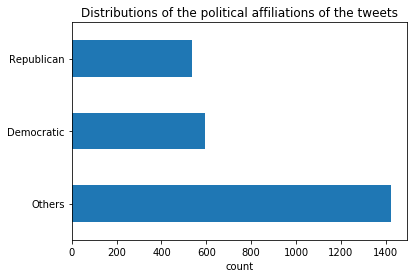

In [24]:
CountStatus = pd.value_counts(df_el['party_class'], sort=True)
CountStatus.plot.barh()
plt.title('Distributions of the political affiliations of the tweets')
plt.xlabel('count')

The political affiliations of both Democratic party and Republican party have a similar number of tweets, with a little larger number of tweets of Democratic party. Most people are still in neutral attitude about 2020 US elections.

### Visualizations - Histograms

Distributions of text length after data cleaning in both generic tweets and US election tweets datasets are depicted in histograms below.

Avg. no of words: 6.91
Std. deviation: 3.0
Max words: 26


Text(0, 0.5, 'count')

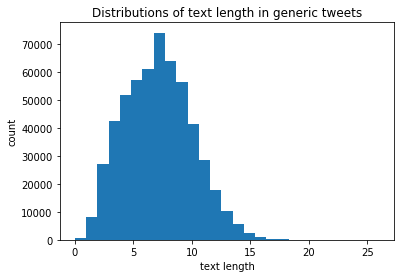

In [25]:
wordDist_sa = [len(w.split()) for w in df_sa['text']]
print('Avg. no of words: ' + str(np.round(np.mean(wordDist_sa), 2)))
print('Std. deviation: ' + str(np.round(np.std(wordDist_sa), 2)))
print('Max words: ' + str(np.max(wordDist_sa)))

# Generate the plot
plt.hist(wordDist_sa,bins=27)
plt.title('Distributions of text length in generic tweets')
plt.xlabel('text length')
plt.ylabel('count')

Avg. no of words: 8.8
Std. deviation: 2.55
Max words: 16


Text(0, 0.5, 'count')

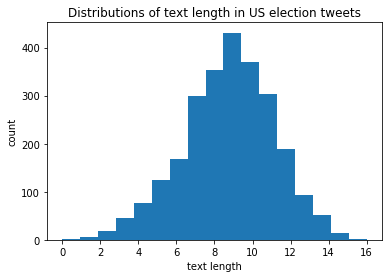

In [26]:
wordDist_el = [len(w.split()) for w in df_el['text']]
print('Avg. no of words: ' + str(np.round(np.mean(wordDist_el), 2)))
print('Std. deviation: ' + str(np.round(np.std(wordDist_el), 2)))
print('Max words: ' + str(np.max(wordDist_el)))

# Generate the plot
plt.hist(wordDist_el,bins=17)
plt.title('Distributions of text length in US election tweets')
plt.xlabel('text length')
plt.ylabel('count')

Both datasets has large counts of text length from 5 to 10. For generic tweets, there is few text with a length that is larger than 15. The counts of text length is approximately a normal distribution with an average of 6.91 and a standard deviation of 3. For US elections tweets, the counts of text length is approximately a normal distribution with an average of 8.8 and a standard deviation of 2.55.

By comparisons, generic tweets tend to have a smaller length of text than US election tweets.

## Word cloud

Word cloud is a data visualization technique used for depict text data in which the size of each word indicates its frequency or importance. Here, we build word clouds for both generic tweets and US elections tweets. 

In [27]:
stopwords = set(STOPWORDS)

# plot wordcloud of given data
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=1.3)
    plt.imshow(wordcloud)
    plt.show()

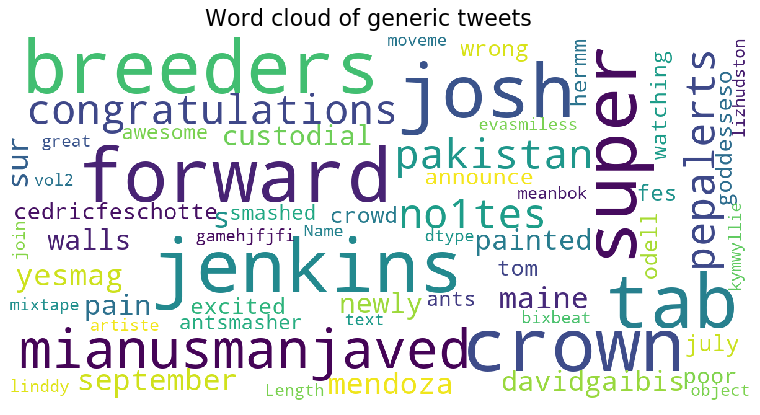

In [28]:
plt.rcParams['figure.figsize']=(8.0,6.0)    
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams['font.size']=12                
plt.rcParams['savefig.dpi']=100             
plt.rcParams['figure.subplot.bottom']=.1 
show_wordcloud(df_sa['text'], 'Word cloud of generic tweets')

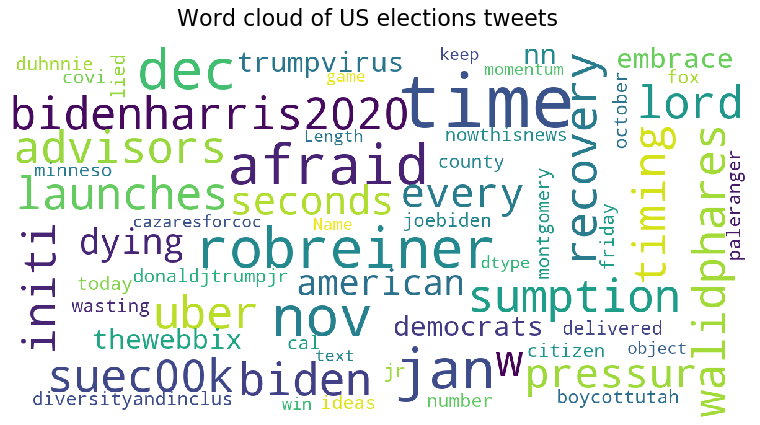

In [29]:
plt.rcParams['figure.figsize']=(8.0,6.0)    
figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams['font.size']=12                
plt.rcParams['savefig.dpi']=100             
plt.rcParams['figure.subplot.bottom']=.1 
show_wordcloud(df_el['text'], 'Word cloud of US elections tweets')

We notice that word clouds for generic tweets and US elections tweets look quite different. More political and electoral words appear in the word cloud of US election tweets.

# 3. Model preparation

In this stage, data is prepared to try multiple classification algorithms. Generic tweets are split randomly into training data (70%) and test data (30%). Then, Bag of Words and TF-IDF are used as two types of features for both generic tweets and US election tweets.

### Data Split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    df_sa['text'].values, df_sa['label'].values, random_state=42, test_size=0.3)

In [31]:
X_el = df_el['text'].values
y_el = df_el['sentiment'].values

### Bag of Words

In bag of words, a piece of text is represented as a bag of words, and the frequency of each word is used as a feature in classification models. It is a commonly used technique to extract features from text.

#### BoW of generic tweets

In [32]:
BoW = CountVectorizer() 
X_train_BoW  = BoW.fit_transform(X_train)
X_train_BoW  = preprocessing.normalize(X_train_BoW) # normalize data
X_test_BoW = BoW.transform(X_test)
X_test_BoW = preprocessing.normalize(X_test_BoW) # normalize data

#### BoW of US elections tweets

In [33]:
X_el_BoW  = BoW.transform(X_el)
X_el_BoW  = preprocessing.normalize(X_el_BoW) # normalize data

### TF-IDF

TF-IDF = TF x IDF, in which Term Frequency summarizes how often a given word appears within a document; Inverse Document Frequency downscales words that appear a lot across documents in the corpus.

TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. The tf-idf value increases proportionally to the number of times a word appears in the document and is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. 

#### TF-IDF of generic tweets

In [34]:
tfidf = TfidfVectorizer()
X_train_tfidf  = tfidf.fit_transform(X_train)
X_train_tfidf  = preprocessing.normalize(X_train_tfidf) # normalize data
X_test_tfidf = tfidf.transform(X_test) 
X_test_tfidf = preprocessing.normalize(X_test_tfidf) # normalize data

#### TF-IDF of US elections tweets

In [35]:
X_el_tfidf  = tfidf.transform(X_el)
X_el_tfidf  = preprocessing.normalize(X_el_tfidf) # normalize data

# 4. Model implementation and tuning

## Part 1: classification of generic tweets

For generic tweets, we implement five classification algorithms including logistic regression, kNN, Naive Bayes, SVM and decision trees, ensembles(random forest and XGBoost) and select the best model based on their testing performance.

### Hyperparameter tuning and cross-validation

Since Part 1 dataset is extremely large, it will take endless time to implement hyperparameter tuning and cross-validation on relatively complex models, such as KNN, decisions trees and random forest. Therefore, hyperparameter tuning and cross-validation are not implemented practically in Part 1. Instead, sample codes of hyperparameter tuning and cross-validation on BoW features are demonstrated in markdowns for each classification algorithm. 

### Logistic regression

#### Hyperparameter tuning - BoW

In [ ]:
lr = LogisticRegression(solver = 'liblinear')
param_grid = {'C':[1000,100,10,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'penalty':['l1','l2']} 
gsv = GridSearchCV(lr, param_grid)

gsv.fit(X_train_BoW,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

#### Model implementation - BoW

In [36]:
lr_BoW = LogisticRegression(C = 10, penalty = 'l2', solver = 'liblinear') # tuning results: C = 10, penalty = 'l2'
lr_BoW.fit(X_train_BoW,y_train)
y_pred = lr_BoW.predict(X_test_BoW)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))

Accuracy on test set: 96.006%


#### Model implementation - TF-IDF

In [37]:
lr_tfidf = LogisticRegression(C = 10, penalty = 'l2', solver = 'liblinear')
lr_tfidf.fit(X_train_tfidf,y_train)
y_pred = lr_tfidf.predict(X_test_tfidf)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))

Accuracy on test set: 96.040%


### KNN

#### Hyperparameter tuning - BoW

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[10,20,30,40,50]} 

gsv = GridSearchCV(knn, param_grid)
gsv.fit(X_train_BoW,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

#### Model implementation - BoW

In [38]:
knn_BoW = KNeighborsClassifier()
knn_BoW.fit(X_train_BoW,y_train)
y_pred = knn_BoW.predict(X_test_BoW)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))

Accuracy on test set: 72.501%


#### Model implementation - TF-IDF

In [39]:
knn_tfidf = KNeighborsClassifier()
knn_tfidf.fit(X_train_tfidf,y_train)
y_pred = knn_tfidf.predict(X_test_tfidf)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))

Accuracy on test set: 61.875%


### Naive Bayes

#### Hyperparameter tuning - BoW

In [ ]:
bnb = BernoulliNB()
param_grid = {'alpha':[1000,100,10,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]} 
gsv = GridSearchCV(bnb, param_grid)
gsv.fit(X_train_BoW,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

#### Model implementation - BoW

In [40]:
bnb_BoW = BernoulliNB(alpha=0.5) # tuning results: alpha=0.5
bnb_BoW.fit(X_train_BoW,y_train)
y_pred = bnb_BoW.predict(X_test_BoW)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))

Accuracy on test set: 93.863%


#### Model implementation - TF-IDF

In [41]:
bnb_tfidf = BernoulliNB(alpha=0.5) 
bnb_tfidf.fit(X_train_tfidf,y_train)
y_pred = bnb_tfidf.predict(X_test_tfidf)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))

Accuracy on test set: 93.863%


### SVM

In SVM model, LinearSVC is used as support vector machine algorithm instead of SVC to avoid endless running time.

#### Hyperparameter tuning - BoW

In [ ]:
svm = LinearSVC()
param_grid = {'C':[1000,100,10,1,0.1,0.01,0.001,0.0001]} 
gsv = GridSearchCV(svm, param_grid,cv=3)

gsv.fit(X_train_BoW,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

#### Model implementation - BoW

In [40]:
svm_BoW = LinearSVC()
svm_BoW.fit(X_train_BoW,y_train)
y_pred = svm_BoW.predict(X_test_BoW)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))

Accuracy on test set: 96.016%


#### Model implementation - TF-IDF

In [41]:
svm_tfidf = LinearSVC()
svm_tfidf.fit(X_train_tfidf,y_train)
y_pred = svm_tfidf.predict(X_test_tfidf)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))

Accuracy on test set: 95.964%


### Decision trees

#### Hyperparameter tuning - BoW

In [ ]:
g = sp_randint(2,300)
dt = DecisionTreeClassifier()
param_grid = {'max_depth':sorted(g.rvs(15))} 
gsv = GridSearchCV(dt, param_grid)
gsv.fit(X_train_BoW,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

#### Model implementation - BoW

In [44]:
dt_BoW = DecisionTreeClassifier()
dt_BoW.fit(X_train_BoW,y_train)
y_pred = dt_BoW.predict(X_test_BoW)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))

Accuracy on test set: 92.655%


#### Model implementation - TF-IDF

In [45]:
dt_tfidf = DecisionTreeClassifier()
dt_tfidf.fit(X_train_tfidf,y_train)
y_pred = dt_tfidf.predict(X_test_tfidf)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))

Accuracy on test set: 92.251%


### Ensembles - random forest

#### Hyperparameter tuning - BoW

In [ ]:
g = sp_randint(2,300)
rf = RandomForestClassifier()
param_grid = {'max_depth':sorted(g.rvs(15)),
             'n_estimators': [100, 300, 500, 700, 900]}
gsv = GridSearchCV(rf, param_grid)
gsv.fit(X_train_BoW,y_train)
print("Best HyperParameter: ",gsv.best_params_)

#### Model implementation - BoW

In [46]:
rf_BoW = RandomForestClassifier()
rf_BoW.fit(X_train_BoW,y_train)
y_pred = rf_BoW.predict(X_test_BoW)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))

Accuracy on test set: 94.938%


#### Model implementation - TF-IDF

In [47]:
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf,y_train)
y_pred = rf_tfidf.predict(X_test_tfidf)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))

Accuracy on test set: 94.882%


### Ensembles - XGBoost

#### Model implementation - BoW

In [38]:
xg_BoW = xgb.XGBClassifier()
xg_BoW.fit(X_train_BoW,y_train)
y_pred = xg_BoW.predict(X_test_BoW)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))

Accuracy on test set: 89.970%


#### Model implementation - TF-IDF

In [39]:
xg_tfidf = xgb.XGBClassifier()
xg_tfidf.fit(X_train_tfidf,y_train)
y_pred = xg_tfidf.predict(X_test_tfidf)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))

Accuracy on test set: 89.862%


### Model selection and  prediction on 2020 US elections data

#### Best model

For BoW features, the best model of generic tweets is SVM, with optimal test accuracy of 96.016% ; for tf-idf features, the best model of generic tweets is logistic regression, with optimal test accuracy of  96.040%.

#### Test on US elections data - BoW

In [42]:
y_pred_BoW = svm_BoW.predict(X_el_BoW)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_el, y_pred_BoW)*100))

Accuracy on test set: 67.672%


#### Test on US elections data - TF-IDF

In [43]:
y_pred_tfidf = lr_tfidf.predict(X_el_tfidf)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_el, y_pred_tfidf)*100))

Accuracy on test set: 68.378%


#### Disucussion

The test accuracy of BoW features is 67.672%, and the test accuracy of tf-idf features is 68.378%. Different featurization techniques do not affect too much the test accuracy on sentiment label prediction in the 2020 US elections data. Tf-idf featured model performs slightly better than BoW featured model on 2020 US elections data.

The predictions on sentiment labels in the 2020 US elections data are not as good as the predictions on generic tweets data. This result is reasonble because the selected best models are trained and tuned based on generic tweets data, on which the model apparently should have a better performance than on other datasets. 

### Sentiment label predictions of Republican party & Democratic party

#### Group by Republican party & Democratic party

In [44]:
df_el['y_pred_BoW'] = y_pred_BoW
df_el['y_pred_tfidf'] = y_pred_tfidf
df_GOP = df_el.loc[df_el['party_class'] == 'Republican']
df_DEM = df_el.loc[df_el['party_class'] == 'Democratic']

#### Create labels of confusion matrix 

In [45]:
def cf_label(cf_matrix):   
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    return labels

#### BoW feature results

Confusion matrix visualization of sentiment prediction results on **Republican party**

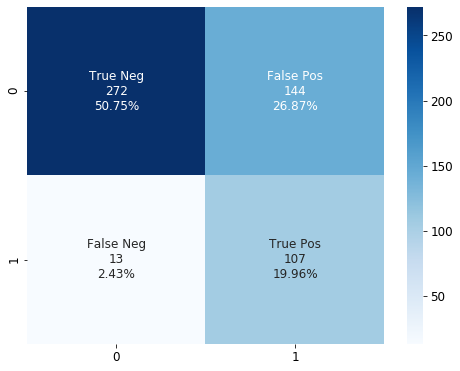

In [46]:
cf_matrix_GOP = confusion_matrix(df_GOP['y_pred_BoW'].values, df_GOP['sentiment'].values)
labels = cf_label(cf_matrix_GOP)
sns.heatmap(cf_matrix_GOP, annot=labels, fmt='', cmap='Blues')

Confusion matrix visualization of sentiment prediction results on **Democratic party**

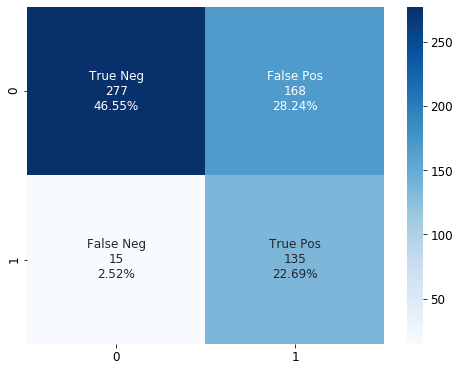

In [47]:
cf_matrix_DEM = confusion_matrix(df_DEM['y_pred_BoW'].values, df_DEM['sentiment'].values)
labels = cf_label(cf_matrix_DEM)
sns.heatmap(cf_matrix_DEM, annot=labels, fmt='', cmap='Blues')

#### TF-IDF feature results

Confusion matrix visualization of sentiment prediction results on **Republican party**

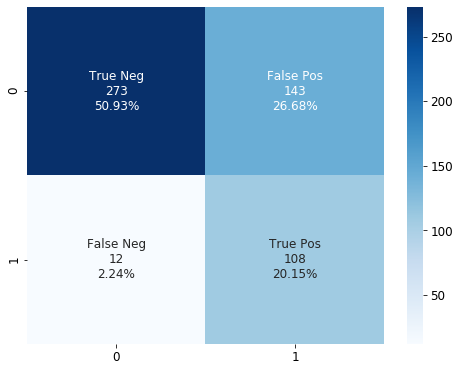

In [48]:
cf_matrix_GOP = confusion_matrix(df_GOP['y_pred_tfidf'].values, df_GOP['sentiment'].values)
labels = cf_label(cf_matrix_GOP)
sns.heatmap(cf_matrix_GOP, annot=labels, fmt='', cmap='Blues')

Confusion matrix visualization of sentiment prediction results on **Democratic party**

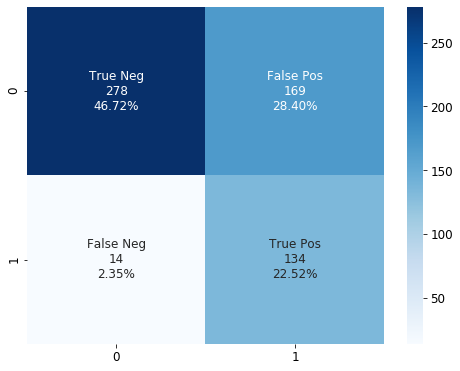

In [49]:
cf_matrix_DEM = confusion_matrix(df_DEM['y_pred_tfidf'].values, df_DEM['sentiment'].values)
labels = cf_label(cf_matrix_DEM)
sns.heatmap(cf_matrix_DEM, annot=labels, fmt='', cmap='Blues')

#### Disucussion

NLP analytics based on tweets is useful for political parties during election campaigns. The political parties are able to learn the public's attitudes or sentiments towards their own party or the opponent parties during the election; then in terms of the current predicted situations of the public, the parties can take corresponding strategies or actions so as to boost the election towards a relatively advantageous direction.

For both parties, sentiment label prediction accuracies are closed. The classifications of negative labels for both parties are much better than the classifications of positive labels. The algorithm doesn't really classify the positive labeled tweets successfully.

### Results 

Based on the true sentiment values of each political party, the number of the negative sentiments is much larger than the positive sentiments for both parties, as shown in the confision matrices. Therefore, both Republican party and Democratic party are viewed more negatively in the public eye at present.

**Suggestions:** Hyperparameter tuning and cross-validation can indeed improve the model performance by selecting the optimal hyperparameters of model and avoiding overfitting at the same time. However, as mentioned at the beginning of Part 1, it is not implemented due to slow execution time.

## Part 2: multi-class classification of negative 2020 US elections tweets

### Preprocessing of negative-reason data

Split the data with negative reasons

In [50]:
df_neg = df_el.loc[df_el['negative_reason'].isnull() == False]

#### Data split

In [51]:
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(
    df_neg['text'].values, df_neg['negative_reason'].values, random_state=42, test_size=0.3)

#### BoW on negative-reason data

In [52]:
BoW = CountVectorizer() 
X_train_neg  = BoW.fit_transform(X_train_neg)
X_train_neg  = preprocessing.normalize(X_train_neg) # normalize data
X_test_neg = BoW.transform(X_test_neg) # normalize data
X_test_neg = preprocessing.normalize(X_test_neg)

### Logistic regresssion

#### Hyperparameter tuning

In [59]:
lr = LogisticRegression(max_iter = 10000)
param_grid = {'C':[1000,100,10,5,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]} 
gsv = GridSearchCV(lr, param_grid, cv=10)

gsv.fit(X_train_neg,y_train_neg)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Best HyperParameter:  {'C': 5}
Best Accuracy: 35.74%


#### Model implementation

In [60]:
lr = LogisticRegression(C = 5, max_iter = 10000) # tuning results: C = 5
lr.fit(X_train_neg,y_train_neg)
y_pred = lr.predict(X_test_neg)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test_neg, y_pred)*100))

Accuracy on test set: 33.947%


### SVM

#### Hyperparameter tuning

In [61]:
svm = SVC(decision_function_shape='ovo')
param_grid = {'gamma':[1000,100,10,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001],
             'C':[1000,100,10,1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]} 
gsv = GridSearchCV(svm, param_grid, n_jobs=-1,cv=10)

gsv.fit(X_train_neg,y_train_neg)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Best HyperParameter:  {'C': 1000, 'gamma': 1}
Best Accuracy: 37.10%


#### Model implementation

In [53]:
svm = SVC(C=1000, gamma=1, decision_function_shape='ovo') # tuning results: C=1000, gamma=1
svm.fit(X_train_neg,y_train_neg)
y_pred = svm.predict(X_test_neg)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test_neg, y_pred)*100))

Accuracy on test set: 35.263%


### Decision trees

#### Hyperparameter tuning

In [63]:
g = sp_randint(2,300)
dt = DecisionTreeClassifier()
param_grid = {'max_depth':sorted(g.rvs(50))} 
gsv = GridSearchCV(dt, param_grid,cv=10)
gsv.fit(X_train_neg,y_train_neg)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Best HyperParameter:  {'max_depth': 2}
Best Accuracy: 34.61%


#### Model implementation

In [64]:
dt = DecisionTreeClassifier(max_depth=7) # tuning results: max_depth=7
dt.fit(X_train_neg,y_train_neg)
y_pred = dt.predict(X_test_neg)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test_neg, y_pred)*100))

Accuracy on test set: 32.105%


### Results 

Hyperparameter tuning and cross-validation are used to obtain the optimal hyperparameters for each algorithm. By comparison, the best model for multi-class classification of negative 2020 US elections tweets is SVM (C=1000, gamma=1), with optimal test accuracy of 35.263%.

Possible reasons why your model may fail to predict the correct negative reasons are as follows:

1. Imbalanced dataset might produce unsatisfactory classifiers.
<br>
i.e.
<br>
{'corruption': 66,
<br>
 'discrimination': 66, 
<br>
 'covid19': 107, 
<br>
 'crime': 74,
<br>
 'others': 67}


2. The dataset of negative 2020 US elections tweets has a small number of samples, which is not enough for good classification results. 
<br>
(i.e. 1264 samples in negative-reason dataset, 380 samples in the test set)


3. Feature engineering methods and classification algorithms might not be the optimal.

**Suggestions:** 

1. Data resampling techniques can be used to obtain a balanced dataset. Algorithmic emsemble techniques, such as bagging (bootstrapping) and AdaBoost, can also be used to deal with imbalanced datasets. Both techniques are able to improve the accuracy of models.

2. Different feature engineering methods such as word embeddings, N-gram BoW or Word2Vec can be also tried to improve the models 

3. Deep learning algorithm such as recurrent neural network can also help to improve the models.